In [18]:
using LinearAlgebra
using PlotlyJS

include("hubbard_core.jl")

no_particles_from_state (generic function with 1 method)

In [19]:
t = 1
U = 1

const N = 2
const states = reshape(Iterators.product([[0,1] for _ in 1:2N]...) .|> collect, (1, 2^(2N)))
const next = [collect(2:N); 1]

2-element Vector{Int64}:
 2
 1

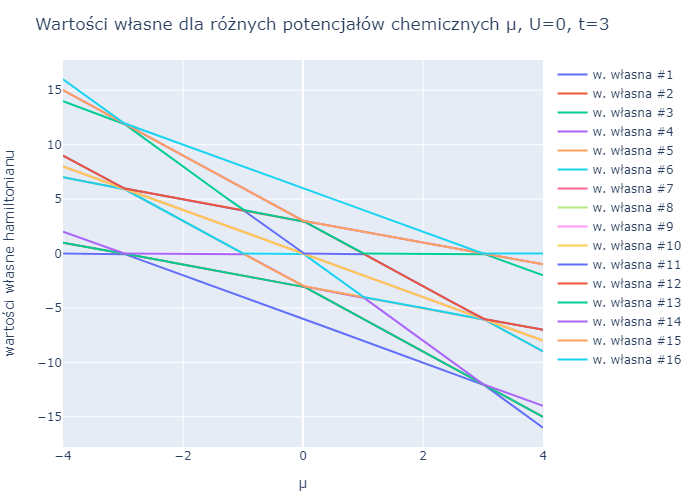

In [20]:
pot_max = 4
pot_step = 0.01
potentials = collect(-pot_max:pot_step:pot_max)
eigs_mat_orig = reduce(hcat,[real(eigvals(get_hamiltonian(states, U, t, pot, next, N))) for pot in potentials])'
eigs_mat = [eigs_mat_orig[:,i] for i in 1:size(eigs_mat_orig,2)]
layout = Layout(
    title="Wartości własne dla różnych potencjałów chemicznych μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="wartości własne hamiltonianu",
)
pl = plot([scatter(x=potentials, y=eig, name="w. własna #$no") for (eig, no) in zip(eigs_mat, 1:(2N)^2)], layout)

Wybieramy stany o najmniejszej energii (dolna krawędź powyższego wykresu):

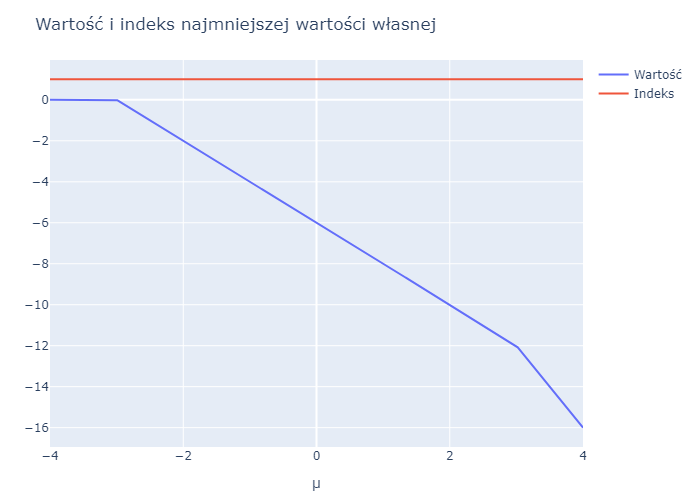

In [21]:
ground_energies = [findmin(eigs_mat_orig[i,:]) for i in 1:size(potentials,1)]
ground_states = [real(eigvecs(get_hamiltonian(states, U, t, pot, next, N)))[:,g[2]] for (pot, g) in zip(potentials, ground_energies)]

layout = Layout(
    title="Wartość i indeks najmniejszej wartości własnej",
    xaxis_title="μ",
)
plot([scatter(x=potentials, y=[g[1] for g in ground_energies], name="Wartość"),
 scatter(x=potentials, y=[g[2] for g in ground_energies], name="Indeks")], layout)

Średnia ilość cząstek w stanie, w zależności od potencjału chemicznego:

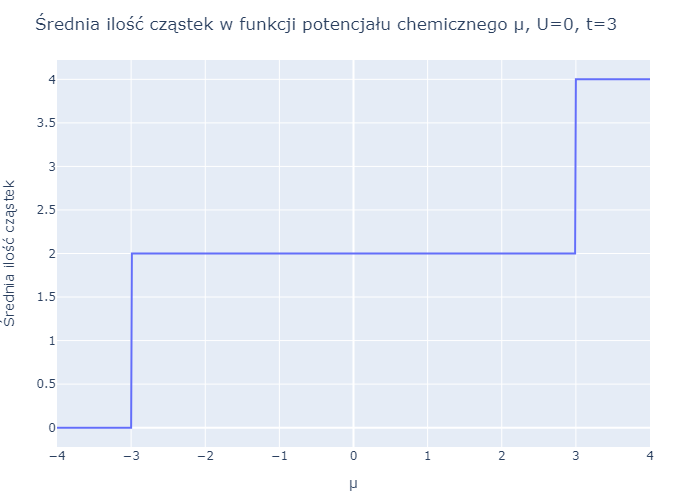

In [22]:
avg_no_particles = [no_particles_from_state(state, N) for state in ground_states]
layout = Layout(
    title="Średnia ilość cząstek w funkcji potencjału chemicznego μ, U=$U, t=$t",
    xaxis_title="μ",
    yaxis_title="Średnia ilość cząstek",
)
plot([scatter(x=potentials, y=avg_no_particles)], layout)